# Data Exploration - Phase II
Shpaner, Leonid  
Robinson, Christopher  
Luis-Estrada, Jose  

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library

/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library


In [3]:
####################################
## import the requisite libraries ##
####################################
import os
import csv
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import stats models for q-q plots and 
# baseline logistic regression
import statsmodels.api as sm

import warnings
# suppress warnings for cleaner output
warnings.filterwarnings('ignore')
# suppress future warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# check current working directory
current_directory = os.getcwd()
current_directory

'/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library'

### Assign Paths to Folders

In [5]:
# path to the data file
data_path1 = '/content/drive/Shareddrives/Capstone - Best Group/' \
           + 'Final_Data_20220719/CrimesLA_Streets_with_Crimes.csv'

# path to data folder
data_path2 = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime/'\
             'Data Folder/'

# path to the training file
data_path3 = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime/'\
             'Data Folder/train_set.csv'

# path to the image library
image_path = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime'\
          + '/Image Folder'        

In [6]:
# bring in original dataframe only for join purposes
df = pd.read_csv('/content/drive/Shareddrives/Capstone - Best Group/' \
               + 'Final_Data_20220719/df.csv', low_memory=False) \
               .set_index('OBJECTID')

In [7]:
# read in the training .csv file to a dataframe using pandas
df_eda = pd.read_csv(data_path2 + 'eda_set.csv', low_memory=False).set_index('OBJECTID')

In [8]:
df_eda.shape

(128205, 17)

In [9]:
df.head()

,Shape,Join_Count,TARGET_FID,JOIN_FID,FullName,Type,Elevation,Surface,Status,DrivingDir,...,LON,Shape_Length,Date_Disclosed,Date_Occurred,Days_Disclosure,Street_Type,Victim_Sex,Gender,Victim_Desc,Crime_Code
OBJECTID,,,,,,,,,,,,,,,,,,,,,
18,"(-13168057.17375, 3992141.1804500036)",1,18,33113,NaN,Alley,Unknown,Unknown,Unknown,Two Way,...,-118.2907,120.220887,2021-10-23,2021-10-23,0,5,M,2,Black,0
36,"(-13180677.51995, 4031566.0669)",1,36,18064,NaN,Secondary,Surface,Paved,Unrestricted,Two Way,...,-118.4040,15.473452,2020-10-19,2020-10-19,0,6,M,2,White,0
37,"(-13180677.51995, 4031566.0669)",1,36,30252,NaN,Secondary,Surface,Paved,Unrestricted,Two Way,...,-118.4040,15.473452,2021-12-24,2021-12-21,3,6,F,1,Hispanic/Latin/Mexican,0
44,"(-13160890.369035002, 4035687.0216437643)",1,43,31551,NaN,Minor,Surface,Paved,Unrestricted,Two Way,...,-118.2265,118.766240,2021-07-17,2021-07-17,0,8,M,2,Other Asian,1
56,"(-13165346.8195, 4030644.1469999994)",1,55,19828,NaN,Secondary,Surface,Paved,Unrestricted,Two Way,...,-118.2663,9.731604,2020-03-22,2020-03-22,0,6,M,2,Other,0


In [10]:
# show the columns of the dataframe for inspection
df_eda.columns

Index(['Zip_Code', 'Accuracy', 'Crime_Cost', 'StreetOID', 'DR_NO', 'TIME_OCC',
       'AREA', 'Part_1_2', 'Vict_Age', 'Premis_Cd', 'Weapon_Used_Cd',
       'Days_Disclosure', 'Street_Type', 'Gender', 'Crime_Code', 'age_bin',
       'crime_sev'],
      dtype='object')

In [11]:
df.columns

Index(['Shape', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'FullName', 'Type',
       'Elevation', 'Surface', 'Status', 'DrivingDir', 'From_L', 'From_R',
       'To_L', 'To_R', 'Parity_L', 'Parity_R', 'StPreDir', 'StPreMod',
       'StPreType', 'StArticle', 'StName', 'StPostType', 'StPostDir',
       'StPostMod', 'Zip_L', 'Zip_Code', 'LCity_L', 'LCity_R', 'NameCat_L',
       'NameCat_R', 'Accuracy', 'Jurisdiction', 'Source', 'SourceID',
       'UpdateDate', 'MSAG_LCity', 'MSAG_RCity', 'MSAG_LESN', 'MSAG_RESN',
       'Crime_Cost', 'StreetOID', 'Field1', 'DR_NO', 'Date_Rptd', 'DATE_OCC',
       'TIME_OCC', 'AREA', 'AREA_NAME', 'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd',
       'Crm_Cd_Desc', 'Mocodes', 'Vict_Age', 'Vict_Sex', 'Vict_Descent',
       'Premis_Cd', 'Premis_Desc', 'Weapon_Used_Cd', 'Weapon_Desc', 'Status_1',
       'Status_Desc', 'Crm_Cd_1', 'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4',
       'LOCATION', 'Cross_Street', 'LAT', 'LON', 'Shape_Length',
       'Date_Disclosed', 'Date_Occurred', 'D

In [12]:
df_eda = df_eda.join(df['Status_Desc'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Type'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Victim_Sex'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Victim_Desc'], how='left', lsuffix='left', rsuffix='right')
df_eda.head()

,Zip_Code,Accuracy,Crime_Cost,StreetOID,DR_NO,TIME_OCC,AREA,Part_1_2,Vict_Age,Premis_Cd,...,Days_Disclosure,Street_Type,Gender,Crime_Code,age_bin,crime_sev,Status_Desc,Type,Victim_Sex,Victim_Desc
OBJECTID,,,,,,,,,,,,,,,,,,,,,
69772,90024.0,50.0,2.0,27815,210814900.0,750.0,8.0,2.0,40.0,102.0,...,0,7,1,0,35-40,Less Serious,Invest Cont,Primary,F,Other Asian
131641,90037.0,50.0,3.0,51117,210313311.0,1100.0,3.0,1.0,32.0,101.0,...,0,8,2,0,30-35,Less Serious,Invest Cont,Minor,M,Black
143866,90016.0,50.0,1.0,55526,200705585.0,1420.0,7.0,1.0,46.0,101.0,...,0,7,2,1,45-50,More Serious,Adult Other,Primary,M,Hispanic/Latin/Mexican
189323,90003.0,50.0,0.0,72325,221213641.0,910.0,12.0,2.0,25.0,102.0,...,0,8,1,0,20-25,Less Serious,Invest Cont,Minor,F,Hispanic/Latin/Mexican
89956,91331.0,50.0,2.0,35427,221606939.0,1625.0,16.0,2.0,63.0,108.0,...,0,6,2,0,60-65,Less Serious,Invest Cont,Secondary,M,White


In [13]:
# display the strings contained within the column and respective value counts
df_eda['Victim_Sex'].value_counts()

M    75553
F    47979
X     4673
Name: Victim_Sex, dtype: int64

In [14]:
# rename strings contained within 'Victim_Sex' column only on df_eda dataframe
# for cleaner look when observing subsequent charts/plots
df_eda['Victim_Sex'] = df_eda['Victim_Sex'].map({'M': 'Male', 'F': 'Female', 
                                                 'X': 'Uknown'})

In [15]:
# re-inspect the shape of the dataframe. This is also done on EDA file.
df_eda.shape

(128205, 21)

## Bar Plot of Age Range

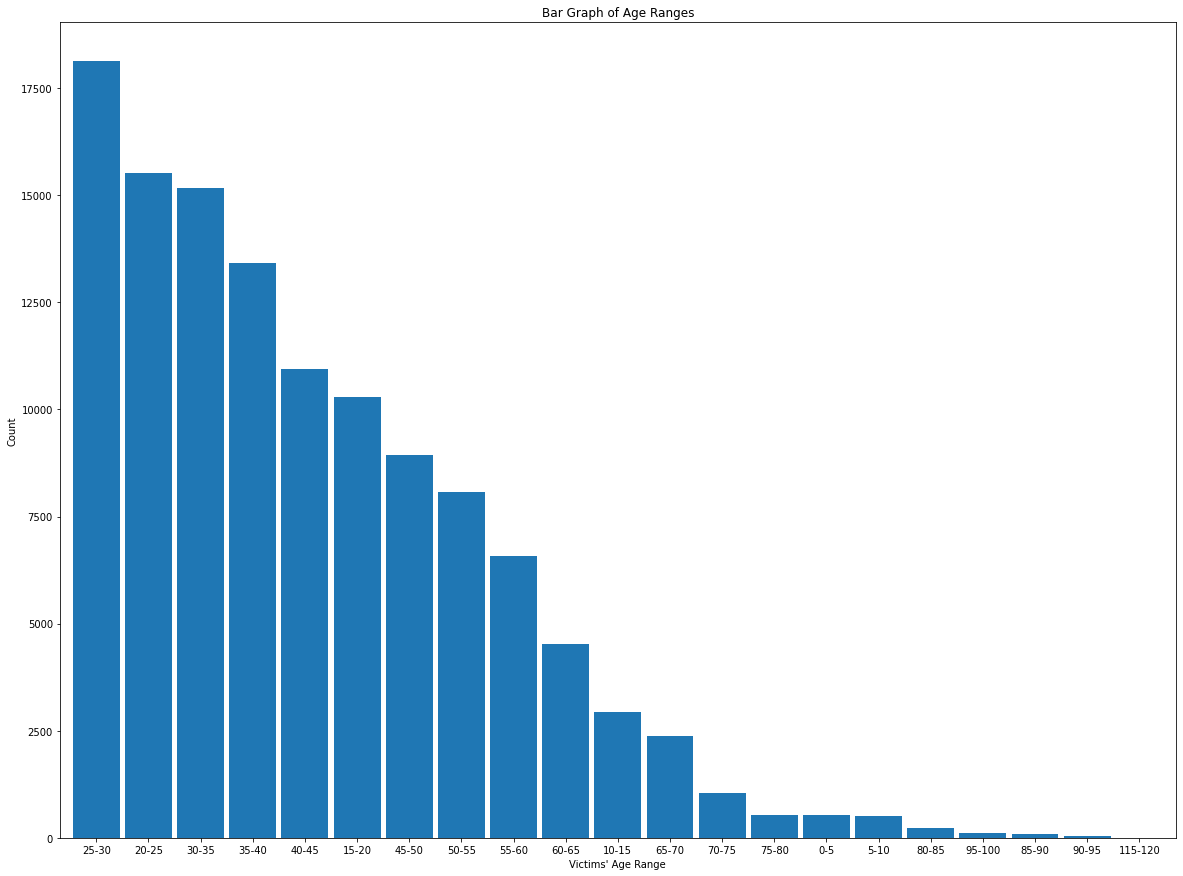

In [16]:
# this bar_plot library was created as a bar_plot.py file during the EDA Phase I
# stage; it can be acccessed in that respective notebook
from functions import bar_plot
bar_plot(20,15, df_eda, False, 'bar', 'Bar Graph of Age Ranges', 0, 
         "Victims' Age Range", 'Count', 'age_bin', 100)
plt.savefig(image_path + '/age_range_bargraph.png', bbox_inches = 'tight')

## Contingency Table

In [17]:
def cont_table(df, col1, lev1, col2, lev2, new):
  crime_less = df.loc[df[col1]==lev1].groupby([col2])[[col1]].count()
  crime_less.rename(columns = {col1:lev1}, inplace=True)
  crime_more = df.loc[df[col1]==lev2].groupby([col2])[[col1]].count()
  crime_more.rename(columns={col1:lev2}, inplace=True)
  crime_res_comb = pd.concat([crime_less, crime_more], axis=1)

  # sum row totals
  crime_res_comb['Total']=crime_res_comb.sum(axis=1)
  crime_res_comb.loc['Total']=crime_res_comb.sum(numeric_only=True, axis=0)
  # get % total of each row
  crime_res_comb['% More Serious']=round((crime_res_comb[lev2] / 
  (crime_res_comb[lev2]+crime_res_comb[lev1]))*100, 2)
  crime_res_comb[lev2]=crime_res_comb[lev2].fillna(0)
  crime_res_comb['% More Serious']=crime_res_comb['% More Serious'].fillna(0)
  df.rename_axis(new)
  # crime_res_comb.set_index('new_index_name')
  
  return crime_res_comb.style.format("{:,.0f}")

### Contingency Table - Crime Severity by Age Groups

In [18]:
age_table = cont_table(df_eda, 'crime_sev', 'Less Serious', 'age_bin', 
                       'More Serious', 'N').data
age_table

,Less Serious,More Serious,Total,% More Serious
age_bin,,,,
0-5,177.0,348.0,525.0,66.29
10-15,1593.0,1349.0,2942.0,45.85
15-20,4375.0,5924.0,10299.0,57.52
20-25,6728.0,8802.0,15530.0,56.68
25-30,7693.0,10437.0,18130.0,57.57
30-35,6787.0,8391.0,15178.0,55.28
35-40,5948.0,7476.0,13424.0,55.69
40-45,4695.0,6244.0,10939.0,57.08
45-50,4070.0,4876.0,8946.0,54.50


## Summary Statistics

In [19]:
def summ_stats(df, var1, var2):
    print("\033[1m"+'Summary Statistics by Age'+"\033[1m")
    pd.options.display.float_format = '{:,.2f}'.format
    summ_stats = df.groupby(var1)[var2].agg(['mean', 'median', 'std', 'min', 'max'])
    summ_stats.loc['Total'] = summ_stats.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = summ_stats.rename(columns = column_rename)
    return dfsummary

### Status Description by Age

In [20]:
summ_stats(df_eda, 'Status_Desc', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Status_Desc,,,,,
Adult Arrest,32.95,32.00,17.80,0.00,99.00
Adult Other,35.67,34.00,15.21,0.00,99.00
Invest Cont,34.64,33.00,17.02,0.00,120.00
Juv Arrest,26.17,23.00,16.52,0.00,81.00
Juv Other,24.10,17.00,16.35,0.00,76.00
Total,153.53,139.00,82.90,0.00,475.00


### Victim Sex by Age

In [21]:
summ_stats(df_eda, 'Victim_Sex', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Victim_Sex,,,,,
Female,34.44,32.00,15.21,0.00,99.00
Male,36.32,35.00,16.49,0.00,99.00
Uknown,5.45,0.00,12.59,0.00,120.00
Total,76.22,67.00,44.29,0.00,318.00


## Stacked Bar Plots

In [22]:
def stacked_plot (x, y, p, df, col, truth, condition, kind, title1, xlabel1, ylabel1, width, 
                  rot, title2, xlabel2, ylabel2):
  fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(x, y))
  flat = axes.flatten()
  fig.tight_layout(w_pad=5, pad=p, h_pad=5)
  flat = axes.flatten()
  fig.suptitle('Absolute Distributions vs. Normalized Distributions')

  crosstabdest = pd.crosstab(df[col], df[truth])\
                .sort_values(by=[condition], ascending=False)
  crosstabdestnorm = crosstabdest.div(crosstabdest.sum(1), axis = 0)

  plotdest = crosstabdest.plot(kind=kind, stacked=True, title=title1, 
                               ax=flat[0], 
                               color=['#00BFC4', '#F8766D'], width=width, 
                               rot=rot)
  flat[0].set_xlabel(xlabel1)
  flat[0].set_ylabel(ylabel1)
  plotdestnorm = crosstabdestnorm.plot(kind=kind, stacked=True, title=title2,
                                       ylabel='Frequency', 
                                       ax=flat[1], color=['#00BFC4', '#F8766D'], 
                                       width=width, rot=rot)
  flat[1].set_xlabel(xlabel2)
  flat[1].set_ylabel(ylabel2)
  plt.xlabel(xlabel2)

### Crime Severity by Age Group

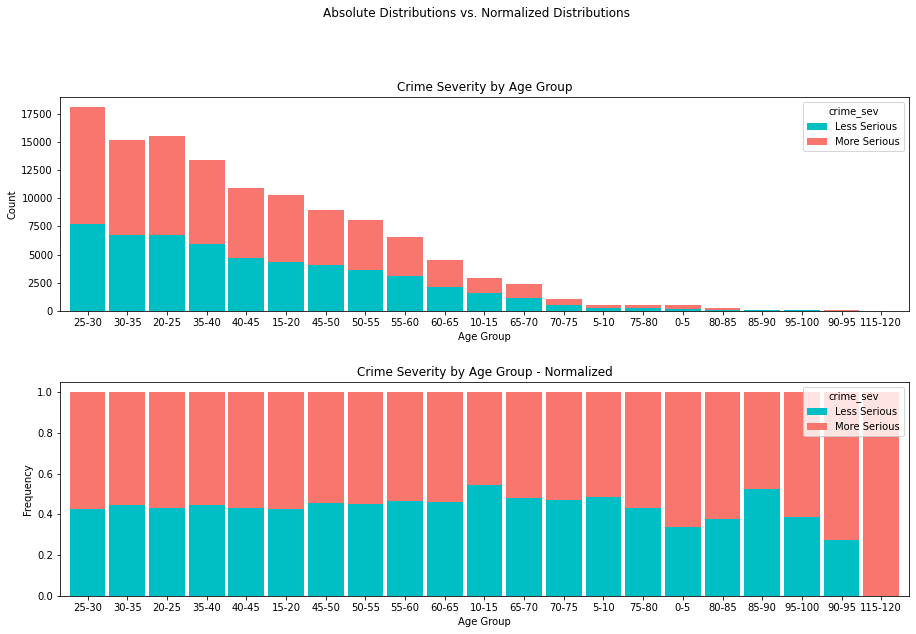

In [23]:
stacked_plot(15, 10, 10, df_eda, 'age_bin', 'crime_sev', 'Less Serious', 'bar', 
             'Crime Severity by Age Group', 'Age Group', 'Count', 0.9, 0,
             'Crime Severity by Age Group - Normalized', 'Age Group', 'Frequency')
plt.savefig(image_path + '/age_crime_bargraph.png', bbox_inches = 'tight')

### Status Description by Crime Severity

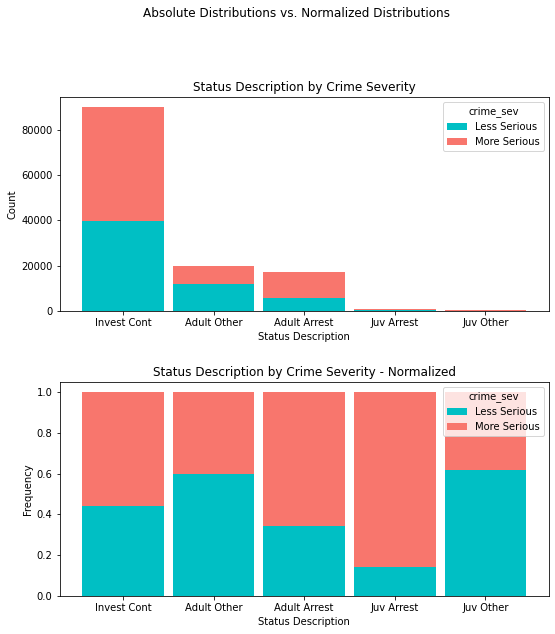

In [24]:
stacked_plot(10, 10, 10, df_eda, 'Status_Desc', 'crime_sev', 'Less Serious', 
             'bar', 'Status Description by Crime Severity', 'Status Description', 
             'Count', 0.9, 0, 'Status Description by Crime Severity - Normalized', 
             'Status Description', 'Frequency')
plt.savefig(image_path + '/status_desc_bargraph.png', bbox_inches = 'tight')

### Crime Severity by Street Type

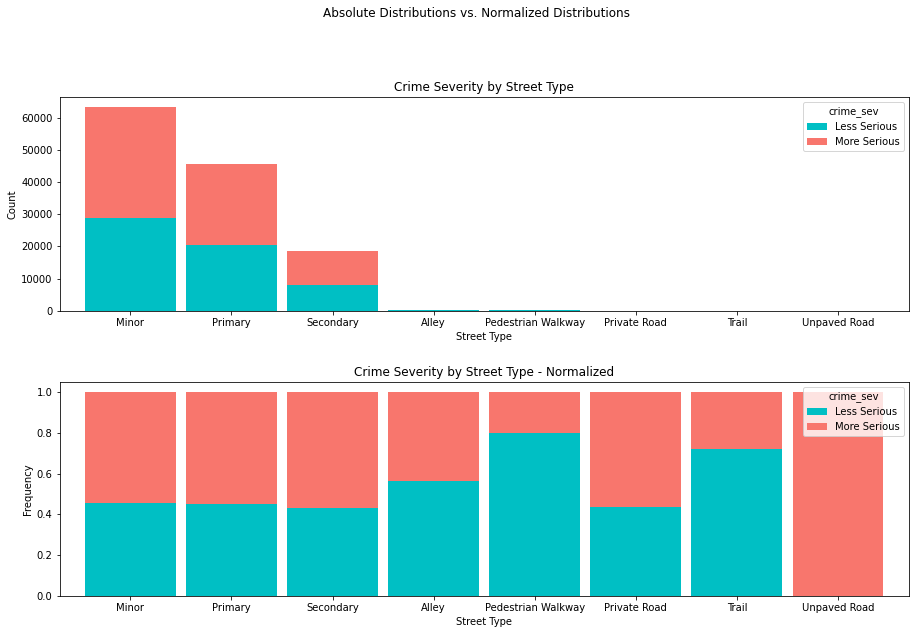

In [25]:
stacked_plot(15, 10, 10, df_eda, 'Type', 'crime_sev', 'Less Serious', 'bar', 
             'Crime Severity by Street Type', 'Street Type', 'Count', 0.9, 0, 
             'Crime Severity by Street Type - Normalized', 'Street Type',
             'Frequency')
plt.savefig(image_path + '/street_type_bargraph.png', bbox_inches = 'tight')

### Victim's Sex by Crime Severity

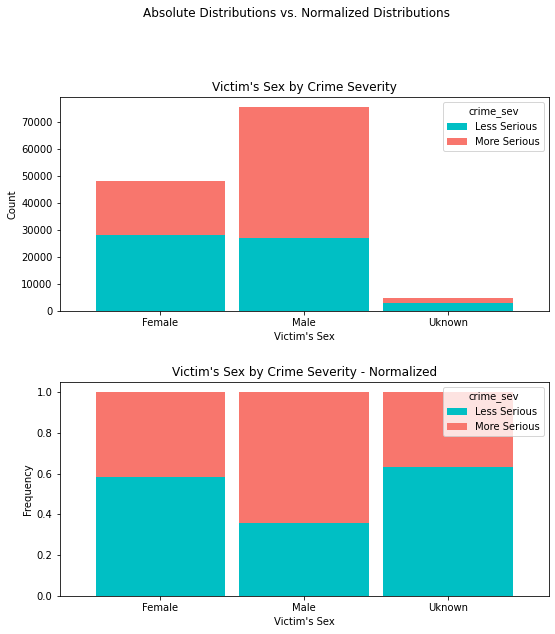

In [26]:
stacked_plot(10, 10, 10, df_eda, 'Victim_Sex', 'crime_sev', 'Less Serious', 'bar', 
             "Victim's Sex by Crime Severity", "Victim's Sex", 'Count', 0.9, 0, 
             "Victim's Sex by Crime Severity - Normalized", "Victim's Sex",
             'Frequency')
plt.savefig(image_path + '/victim_sex_bargraph.png', bbox_inches = 'tight')

## Victim Descent by Crime Severity

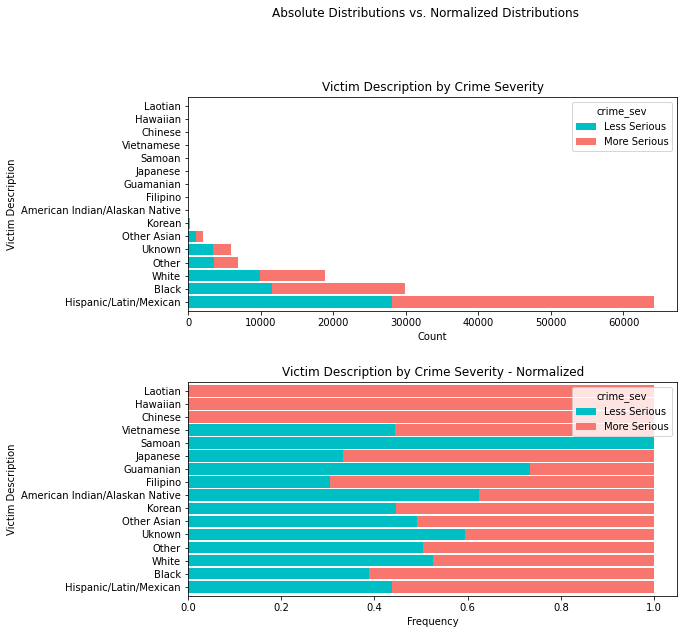

In [27]:
stacked_plot(10,10, 10, df_eda, 'Victim_Desc', 'crime_sev', 'Less Serious', 'barh', 
            'Victim Description by Crime Severity', 'Count', 'Victim Description', 
             0.9, 0, 'Victim Description by Crime Severity - Normalized', 
             'Frequency', 'Victim Description')
plt.savefig(image_path + '/victim_desc_bargraph.png', bbox_inches = 'tight')

## Examining Possible Correlations

In [28]:
train_set = pd.read_csv(data_path3)

In [29]:
def corr_plot(df, x, y):
  # correlation matrix title
  print("\033[1m"+'Cervical Cancer Data: Correlation Matrix'+"\033[1m")
  # assign correlation function to new variable
  corr = df.corr()
  matrix = np.triu(corr) # for triangular matrix
  plt.figure(figsize=(x,y))
  # parse corr variable intro triangular matrix
  sns.heatmap(df.corr(method='pearson'), 
              annot=True, linewidths=.5, cmap='coolwarm', mask=matrix,
              square = True, 
              cbar_kws={'label': 'Correlation Index'})
  plt.show()

In [30]:
corr_df = train_set.reset_index(drop=True)
corr_df = corr_df.drop(columns='OBJECTID')

Cervical Cancer Data: Correlation Matrix


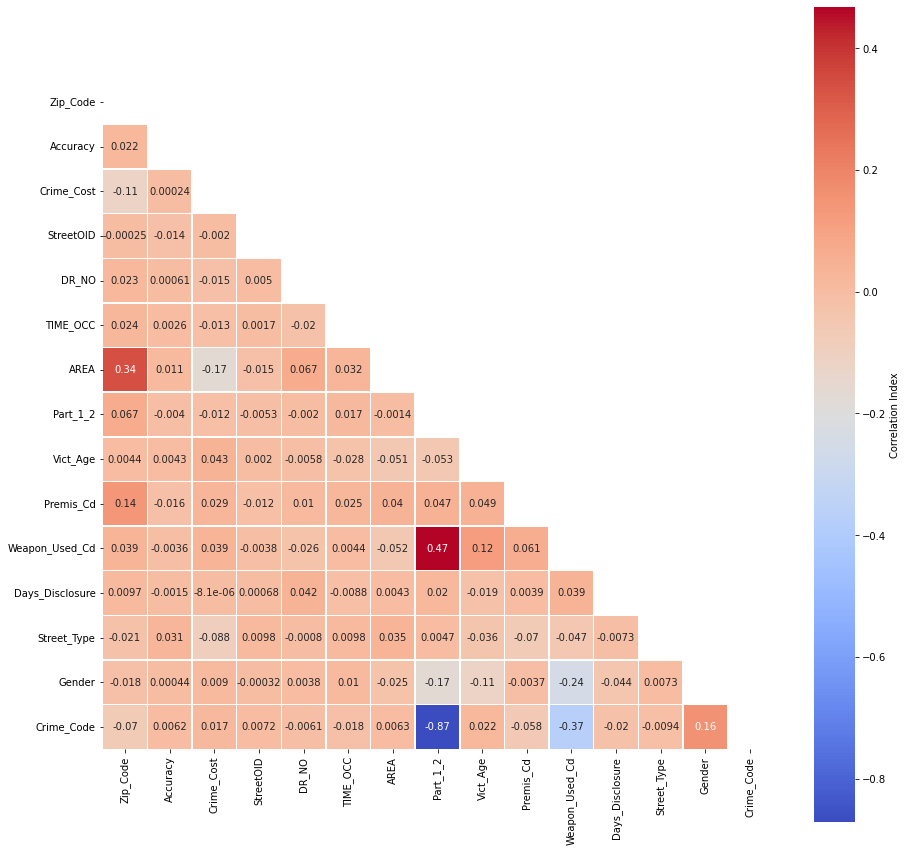

In [31]:
corr_plot(corr_df, 15, 15)